# Exercises

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
tips = sns.load_dataset('tips')

In [25]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Ex 1. 요일 막대 그래프(요일 빈도수)

* 세로 막대 그래프
* 가로 막대 그래프


In [26]:
day_counts = tips.day.value_counts()
day_counts

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [27]:
day_counts.index

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')

In [28]:
day_counts.values

array([87, 76, 62, 19])

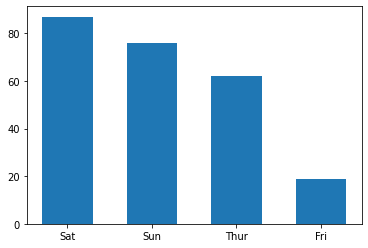

In [29]:
plt.bar(x=day_counts.index, height=day_counts.values, width=0.6)
plt.show()

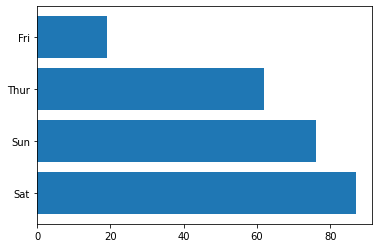

In [30]:
plt.barh(y=day_counts.index, width=day_counts.values)
plt.show()

## Ex 2. 흡연여부 막대 그래프(흡연자/비흡연자 빈도수)

* 세로 막대 그래프
* 가로 막대 그래프


In [31]:
smoker_counts = tips.smoker.value_counts()
smoker_counts

No     151
Yes     93
Name: smoker, dtype: int64

In [32]:
print(smoker_counts.index)
print(smoker_counts.values)

CategoricalIndex(['No', 'Yes'], categories=['Yes', 'No'], ordered=False, dtype='category')
[151  93]


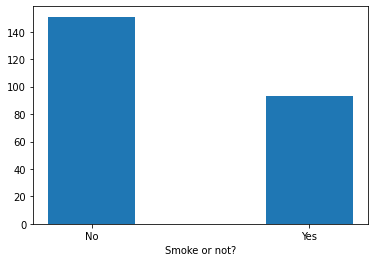

In [33]:
plt.bar(x=smoker_counts.index, height=smoker_counts.values, width=0.4)
plt.xlabel('Smoke or not?')
plt.show()

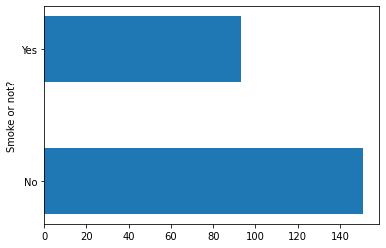

In [34]:
plt.barh(y=smoker_counts.index, width=smoker_counts.values, height=0.5)
plt.ylabel('Smoke or not?')
plt.show()

## Ex 3. 식사 인원 막대 그래프

* 세로 막대 그래프
* 가로 막대 그래프


In [35]:
size_counts = tips['size'].value_counts()
size_counts

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [36]:
print(size_counts.index)
print(size_counts.values)

Int64Index([2, 3, 4, 5, 1, 6], dtype='int64')
[156  38  37   5   4   4]


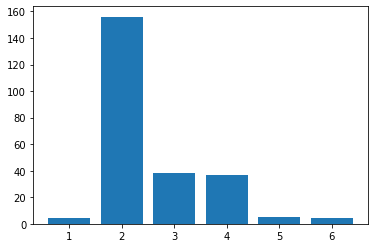

In [37]:
plt.bar(x=size_counts.index, height=size_counts.values)
plt.show()

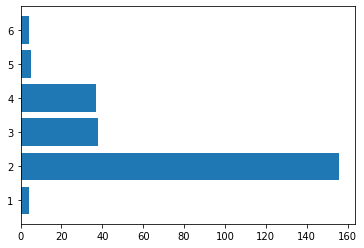

In [38]:
plt.barh(y=size_counts.index, width=size_counts.values)
plt.show()

## Ex 4. 성별 tip의 box plot을 하나의 subplot에 그리기.

In [39]:
tips.groupby('sex').tip.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5


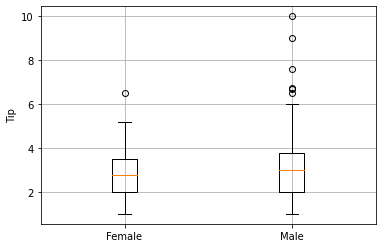

In [40]:
fig, ax = plt.subplots()
array = np.array([tips[tips.sex == 'Female']['tip'], tips[tips.sex == 'Male']['tip']], dtype=object)
ax.boxplot(x=array, labels=['Female', 'Male'])
# ax.set_xticklabels(['Female', 'Male'])
ax.set_ylabel('Tip')
ax.grid()
plt.show()

## Ex 5. 시간별 tip의 box plot을 하나의 subplot에 그리기.

In [41]:
tips.groupby('time').tip.describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0


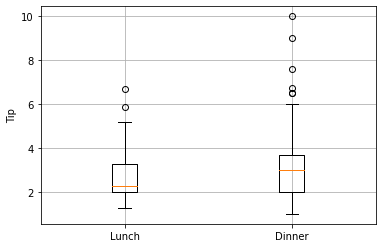

In [42]:
array = np.array([tips[tips['time'] == 'Lunch'].tip, tips[tips['time'] == 'Dinner'].tip], dtype=object)
plt.boxplot(x=array)
plt.xticks([1,2],['Lunch', 'Dinner'])
plt.ylabel('Tip')
plt.grid()
plt.show()

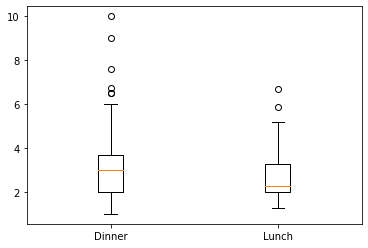

In [52]:
times = tips.time.unique()
data = []
for t in times:
    tip_by_time = tips[tips.time == t].tip
    # print(tip_by_time)
    data.append(tip_by_time)

plt.boxplot(x=np.array(data, dtype=object), labels = times)
plt.show()

## Ex 6. 요일별 tip의 box plot을 하나의 subplot에 그리기.

In [44]:
tips.groupby('day').tip.describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,2.771452,1.240223,1.25,2.0000,2.305,3.3625,6.70
Fri,19.0,2.734737,1.019577,1.00,1.9600,3.000,3.3650,4.73
Sat,87.0,2.993103,1.631014,1.00,2.0000,2.750,3.3700,10.00
Sun,76.0,3.255132,1.234880,1.01,2.0375,3.150,4.0000,6.50


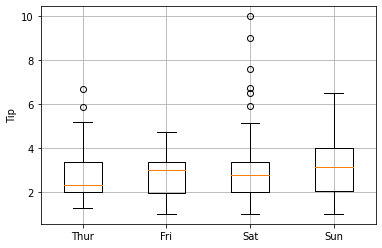

In [45]:
array = np.array([tips[tips.day == 'Thur'].tip, tips[tips.day == 'Fri'].tip, tips[tips.day == 'Sat'].tip, tips[tips.day == 'Sun'].tip], dtype=object)
plt.boxplot(x=array)
plt.grid()
plt.xticks([1,2,3,4],['Thur','Fri','Sat','Sun'])
plt.ylabel('Tip')
plt.show()

Sun
Sat
Thur
Fri


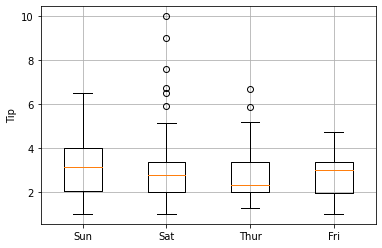

In [46]:
array = []
for x in tips['day'].unique():
    print(x)
    array.append(tips[tips['day'] == x].tip)
array

plt.boxplot(x=np.array(array, dtype=object), labels=tips.day.unique())
# plt.xticks([1,2,3,4],['Sun','Sat','Thur','Fri'])
plt.ylabel('Tip')
plt.grid()
plt.show()

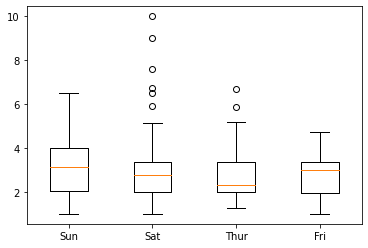

In [47]:
days = tips.day.unique()
data = [tips[tips.day == x].tip for x in days]   # list comprehension
plt.boxplot(x=np.array(data, dtype=object), labels=days)
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


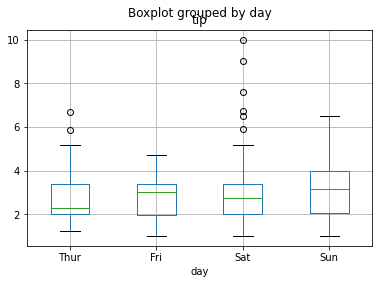

In [48]:
# pd.DataFrame의 그래프 메서드
tips.boxplot(column='tip', by='day')
plt.show()

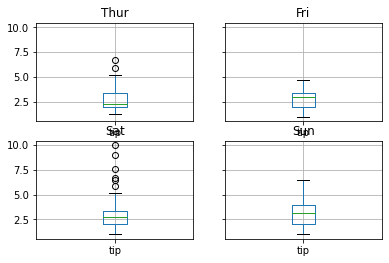

In [49]:
# pd.DataFrameGroupBy의 메서드
tips.groupby('day').boxplot(column='tip')
plt.show()